# 실습 데모: 커스텀 훈련 컨테이너 만들기

#### 2. 컨테이너 빌드하기

#### 자체 학습 모델을 실행하려면 Amazon SageMaker Training Toolkit을 사용하여 Docker 컨테이너를 빌드할 때 반드시 Amazon SageMaker 노트북 인스턴스를 사용해야 한다. (Amazon Studio 에는 Docker 명령어가 없음)

In [1]:
# 현재 버전 체크
import sagemaker

sagemaker.__version__

'2.167.0'

#### 도커 빌드를 위해 dockerfile 에 있는 폴더로 이동
#### 주의: 주석과 cd ~/SageMaker/docker_test_folder 명령어가 하의 셀이 있다면 syntax Error 발ㅇ함. --> Python / SageMaker 버그

In [5]:
cd ~/SageMaker/docker_test_folder

/home/ec2-user/SageMaker/docker_test_folder


In [6]:
# 현재 디렉토리를 확인 (pwd = Print Working Directory)
!pwd

/home/ec2-user/SageMaker/docker_test_folder


In [7]:
# 도커 빌드
# 주의: Docker 컨테이너를 빌드하려면 끝에 마침표(.)가 있는 공백을 포함하여 다음 Docker 빌드 명령을 실행해야 한다.

!docker build -t tf-custom-container-test .

Sending build context to Docker daemon  6.656kB
Step 1/4 : FROM tensorflow/tensorflow:latest-gpu-jupyter
latest-gpu-jupyter: Pulling from tensorflow/tensorflow

351b9876: Pulling fs layer 
47ab5eb5: Pulling fs layer 
4004a3cd: Pulling fs layer 
ef4b90c8: Pulling fs layer 
5b7808f0: Pulling fs layer 
f27d9487: Pulling fs layer 
ce5452b7: Pulling fs layer 
96a5c562: Pulling fs layer 
5b7808f0: Waiting fs layer 
ef4b90c8: Waiting fs layer 
f27d9487: Waiting fs layer 
2ebc3ac7: Pulling fs layer 
b9c327ea: Pulling fs layer 
50d98969: Pulling fs layer 
2b037de7: Pulling fs layer 
c4c4e2d5: Pulling fs layer 
2fb4b02b: Waiting fs layer 
af93509e: Waiting fs layer 
581227d: Waiting fs layer 
50d98969: Waiting fs layer 
23f80590: Pulling fs layer 
2b037de7: Waiting fs layer 
6a5c562: Waiting fs layer 
b700ef54: Pull complete   32B/32BB7MBBExtracting  46.79MB/2.522GBDigest: sha256:64bfb25fd3f85e1b0af1757ef8ff25fb96a261d1e572a4105e3037d0a27cdf67
Status: Downloaded newer image for tensorflow/tensor

In [8]:
# 복수 개의 컨테이너가 유기적으로 묶여서 하나의 도커 애플리케이션으로 동작할 수 있도록 구성하는 도구로써 docker-compose 설치

!pip install docker-compose

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.8/114.8 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 593.2/593.2 kB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 107.5 MB/s eta 0:00:00
  Created wheel for dockerpty: filename=dockerpty-0.4.1-py3-none-any.whl size=16600 sha256=7446dedf95e38daa0f144da4ebdc3a7d929b5fa85d3d96512e458a546dbab7ea
  Stored in directory: /home/ec2-user/.cache/pip/wheels/18/00/32/f75cd03098074f988a01c59a2e3a55ae9c0773eb66acb4cb5e
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=

#### 4. 컨테이터 로컬에서 테스트하기 

In [9]:
# arn:aws:iam::534520364753:role/service-role/AmazonSageMaker-ExecutionRole-20230725T174296 은 
# 노트북 인스턴스 만들때,생성하는 IAM 을 복사해서 넣는다. 생성할 때마다 모두 다른 값이 나온다. 

from sagemaker.estimator import Estimator

# 딥러닝 모델의 학습과 검증, 예측을 구현하기 위해 생성도니 모델 함수를 에스터메이터 객체에 적용함.
estimator = Estimator(image_uri='tf-custom-container-test',
                      role='arn:aws:iam::534520364753:role/service-role/AmazonSageMaker-ExecutionRole-20230725T174296',
                      instance_count=1,
                      instance_type='local')

estimator.fit()

INFO:sagemaker:Creating training-job with name: tf-custom-container-test-2023-07-28-09-20-06-008
INFO:sagemaker.local.local_session:Starting training job
INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole
INFO:sagemaker.local.image:No AWS credentials found in session but credentials from EC2 Metadata Service are available.
INFO:sagemaker.local.image:docker compose file: 
networks:
  sagemaker-local:
    name: sagemaker-local
services:
  algo-1-svfmc:
    command: train
    container_name: er71fkryig-algo-1-svfmc
    environment:
    - '[Masked]'
    - '[Masked]'
    image: tf-custom-container-test
    networks:
      sagemaker-local:
        aliases:
        - algo-1-svfmc
    stdin_open: true
    tty: true
    volumes:
    - /tmp/tmpviexpc3l/algo-1-svfmc/input:/opt/ml/input
    - /tmp/tmpviexpc3l/algo-1-svfmc/output:/opt/ml/output
    - /tmp/tmpviexpc3l/algo-1-svfmc/output/data:/opt/ml/output/data
    - /tmp/tmpviexpc3l/model:/opt/ml/model
 

Creating er71fkryig-algo-1-svfmc ... 
Creating er71fkryig-algo-1-svfmc ... done
Attaching to er71fkryig-algo-1-svfmc
er71fkryig-algo-1-svfmc | 2023-07-28 09:20:09,009 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
er71fkryig-algo-1-svfmc | 2023-07-28 09:20:09,010 sagemaker-training-toolkit INFO     No Neurons detected (normal if no neurons installed)
er71fkryig-algo-1-svfmc | 2023-07-28 09:20:09,020 sagemaker-training-toolkit INFO     instance_groups entry not present in resource_config
er71fkryig-algo-1-svfmc | 2023-07-28 09:20:09,025 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
er71fkryig-algo-1-svfmc | 2023-07-28 09:20:09,027 sagemaker-training-toolkit INFO     No Neurons detected (normal if no neurons installed)
er71fkryig-algo-1-svfmc | 2023-07-28 09:20:09,035 sagemaker-training-toolkit INFO     instance_groups entry not present in resource_config
er71fkryig-algo-1-svfmc | 2023-07-28 09:20:09,039 sagemaker-t

INFO:root:creating /tmp/tmpviexpc3l/artifacts/output/data
INFO:root:copying /tmp/tmpviexpc3l/algo-1-svfmc/output/success -> /tmp/tmpviexpc3l/artifacts/output
INFO:root:creating /tmp/tmpviexpc3l/artifacts/model/1
INFO:root:creating /tmp/tmpviexpc3l/artifacts/model/1/variables
INFO:root:copying /tmp/tmpviexpc3l/model/1/variables/variables.data-00000-of-00001 -> /tmp/tmpviexpc3l/artifacts/model/1/variables
INFO:root:copying /tmp/tmpviexpc3l/model/1/variables/variables.index -> /tmp/tmpviexpc3l/artifacts/model/1/variables
INFO:root:creating /tmp/tmpviexpc3l/artifacts/model/1/assets
INFO:root:copying /tmp/tmpviexpc3l/model/1/fingerprint.pb -> /tmp/tmpviexpc3l/artifacts/model/1
INFO:root:copying /tmp/tmpviexpc3l/model/1/saved_model.pb -> /tmp/tmpviexpc3l/artifacts/model/1


er71fkryig-algo-1-svfmc exited with code 0
Aborting on container exit...
===== Job Complete =====


#### 5. Amazon ECR로 컨테이너 푸시

##### 로컬 모드 테스트를 성공적으로 실행한 후 Docker 컨테이너를 Amazon ECR로 푸시하고 이를 사용하여 Training Job을 실행한다.  

In [11]:
%%sh

# 알고리듬 이름을 지정한다. 
algorithm_name=tf-custom-container-test

# 로그인을 위해 계정 정보 파악
account=$(aws sts get-caller-identity --query Account --output text)

# 현재 설정된 리전 이름을 얻기 (정의되어 있지 않으면, us-west-2 기본)
region=$(aws configure get region)
region=${region:-us-west-2}

# 534520364753.dkr.ecr.us-west-2.amazonaws.com/tf-custom-container-test
fullname="${account}.dkr.ecr.${region}.amazonaws.com/${algorithm_name}:latest"

# ECR에 레포지토리가 없다면, algorithm_name 생성
aws ecr describe-repositories --repository-names "${algorithm_name}" > /dev/null 2>&1
if [ $? -ne 0 ]
then
aws ecr create-repository --repository-name "${algorithm_name}" > /dev/null
fi

# ECR에 get-login-password 와 docker-login 명령어로 aws 접속해서 ECR에 로그인하고 도커 인증함.

aws ecr get-login-password --region ${region}|docker login --username AWS --password-stdin ${fullname}

# 로컬에서 이미지 이름으로 빌드하고 Fullname 으로 ECR 로 푸시함. 

docker build -t ${algorithm_name} .
docker tag ${algorithm_name} ${fullname}

docker push ${fullname}

# 주의 사항 : 만일 실행되지 않으면, IAM의 Role에 AmazonEC2ContainerRegistryFullAccess 정책과 AmazonS3FullAccess 정책을 추가하라.

WARNING! Your password will be stored unencrypted in /home/ec2-user/.docker/config.json.
Configure a credential helper to remove this warning. See
https://docs.docker.com/engine/reference/commandline/login/#credentials-store



Login Succeeded
Sending build context to Docker daemon  6.656kB
Step 1/4 : FROM tensorflow/tensorflow:latest-gpu-jupyter
 ---> 99c4601387b3
Step 2/4 : RUN pip3 install sagemaker-training
 ---> Using cache
 ---> 62ff856baff2
Step 3/4 : COPY train.py /opt/ml/code/train.py
 ---> Using cache
 ---> 180433f95498
Step 4/4 : ENV SAGEMAKER_PROGRAM train.py
 ---> Using cache
 ---> 8bf1a121c329
Successfully built 8bf1a121c329
Successfully tagged tf-custom-container-test:latest
The push refers to repository [534520364753.dkr.ecr.us-west-2.amazonaws.com/tf-custom-container-test]
08a901fc453e: Preparing
c7d4025fd6b9: Preparing
5f70bf18a086: Preparing
1d39b76b247e: Preparing
0d4550aff43c: Preparing
2692c462eca5: Preparing
305a9a2f982a: Preparing
b8366c80bf4a: Preparing
a073a40e4dcd: Preparing
2ec1b5695a98: Preparing
0b37f0d116f4: Preparing
da5d2813a979: Preparing
0eaa6e868aa5: Preparing
1ca9136c7d36: Preparing
dca2891e0e76: Preparing
eaa2ed848ac5: Preparing
ff3418b47754: Preparing
2692c462eca5: Waiti

In [12]:
# 훈련 컨테이너의 Amazon ECR 이미지를 호출

import boto3

account_id = boto3.client('sts').get_caller_identity().get('Account')
ecr_repository = 'tf-custom-container-test'
tag = ':latest'

region = boto3.session.Session().region_name

uri_suffix = 'amazonaws.com'

byoc_image_uri = '{}.dkr.ecr.{}.{}/{}'.format(account_id, region, uri_suffix, ecr_repository + tag)

byoc_image_uri
# 도커 이미지가 있는 주소 이름
# '534520364753.dkr.ecr.us-west-2.amazonaws.com/tf-custom-container-test:latest'

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


'534520364753.dkr.ecr.us-west-2.amazonaws.com/tf-custom-container-test:latest'

In [13]:
# 이전 단계에서 검색한 ecr_image를 사용하여 SageMaker Estimator 객체를 구성gka.
# byoc_image_uri로 SageMaker estimator를 구성하고 Amazon EC2 인스턴스에서 훈련 작업을 시작한다.

import sagemaker
from sagemaker import get_execution_role
from sagemaker.estimator import Estimator

estimator = Estimator(image_uri=byoc_image_uri,
                      role=get_execution_role(),
                      base_job_name='tf-custom-container-test-job',
                      instance_count=1,
                      instance_type='ml.m5.large')

# 모델 훈련
estimator.fit()



INFO:sagemaker:Creating training-job with name: tf-custom-container-test-job-2023-07-28-09-23-10-436


2023-07-28 09:23:10 Starting - Starting the training job...
2023-07-28 09:23:25 Starting - Preparing the instances for training......
2023-07-28 09:24:22 Downloading - Downloading input data...
2023-07-28 09:24:47 Training - Downloading the training image............
2023-07-28 09:26:58 Training - Training image download completed. Training in progress.2023-07-28 09:26:59,416 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2023-07-28 09:26:59,418 sagemaker-training-toolkit INFO     No Neurons detected (normal if no neurons installed)
2023-07-28 09:26:59,442 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2023-07-28 09:26:59,444 sagemaker-training-toolkit INFO     No Neurons detected (normal if no neurons installed)
2023-07-28 09:26:59,458 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2023-07-28 09:26:59,460 sagemaker-training-toolkit INFO     No Neurons detected (normal if no neur

In [14]:
# 자체 컨테이너를 사용해 모델을 배포하려면, 1) 커스텀 추론 컨테이너를 내가 만들어서 사용하거나,  
# 2) 퍼블릭하게 공개된 TensorFlow 모델을 배포할 수 있는 AWSframework 컨테이너를 그대로 사용할 수도 있다. 


import boto3
import sagemaker

# image uris 호출
from sagemaker import image_uris

# mnist 데이터셋의 필기 숫자를 읽기 위해서는 하나의 모델 샘플에서
# 기존의 모델을 훈련하는 데 사용한 동일한 도커 컨테이너 이미지 URI(범용 리소스 식별자)를 추론으로 사용함.

container = image_uris.retrieve(framework='tensorflow',region='us-west-2',version='2.11.0',
                    image_scope='inference',instance_type='ml.m5.xlarge')

container

'763104351884.dkr.ecr.us-west-2.amazonaws.com/tensorflow-inference:2.11.0-cpu'

In [15]:
# 위의 필기 숫자 인식 model 모델 엔터티 및 엔드포인트 구성하고 엔드포인트를 생성
predictor = estimator.deploy(1,instance_type='ml.m5.xlarge',image_uri=container)

INFO:sagemaker:Creating model with name: tf-custom-container-test-job-2023-07-28-09-28-34-043
INFO:sagemaker:Creating endpoint-config with name tf-custom-container-test-job-2023-07-28-09-28-34-043
INFO:sagemaker:Creating endpoint with name tf-custom-container-test-job-2023-07-28-09-28-34-043


---!

INFO:matplotlib.font_manager:generated new fontManager


11490434/11490434 [==============================] - 0s 0us/step
Label: 4


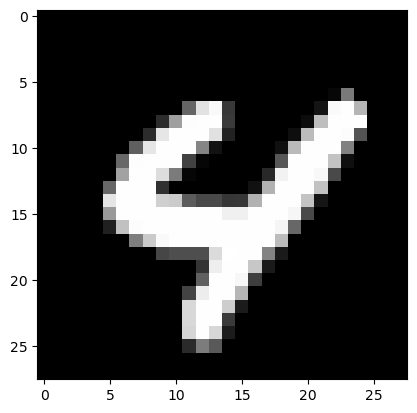

In [16]:
# 테스트 데이터셋에서 샘플을 가져와 검증 

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# MNIST 데이터셋을 로드하고 훈련 및 테스트셋으로 분할
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 훈련 데이터넷에서 랜덤으로 표본을 선택
example_index = np.random.randint(0, x_train.shape[0])
example_image = x_train[example_index]
example_label = y_train[example_index]

# 결과를 레이블에 출력하고 필기체 이미지를 보여줌
print(f"Label: {example_label}")
plt.imshow(example_image, cmap='gray')
plt.show()

In [17]:
from sagemaker.serializers import JSONSerializer

data = {"instances": example_image.tolist()}

# JSONSerializer를 사용해 JSON 형태로 예측 업데이트
predictor.serializer=JSONSerializer() 

# 예측 생성
predictor.predict(data) 

b'{\n    "predictions": [[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]\n    ]\n}'

#### 참고: https://docs.aws.amazon.com/sagemaker/latest/dg/adapt-training-container.html